## GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer to a woman job candidate, given what I would offer a man for the same job?)




In [1]:
#from __future__ import print_function, division
import os
import numpy 
import matplotlib.pylab as pl
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pandas.tools.plotting import scatter_matrix
import scipy.stats as stats
from sklearn import linear_model
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
contents = []
contents.append(('male','pinc08_2'))
contents.append(('female', 'pinc08_3'))
contents.append(('all_eth', '_1_1'))
contents.append(('white', '_1_4'))
contents.append(('black', '_1_6'))
contents.append(('asian', '_1_8'))
contents.append(('hispanic', '_1_9')) 

allmales = {}
allfemales = {}
for i in range(len(contents) - 2):
    allmales[contents[i+2][0]] = pd.read_excel(url+contents[0][1]+contents[i+2][1]+'.xls',
                                               header=9, skip_footer=1)
    allfemales[contents[i+2][0]] = pd.read_excel(url+contents[1][1]+contents[i+2][1]+'.xls', 
                                                 header=9, skip_footer=1)

In [3]:
allmales['all_eth'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228,211,50779,447,0.501,0.0033
2,Earnings,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557,1391,34247,1291,0.63,0.0092


In [4]:
#Remove the Unnamed Columns as they are not required
for content in contents[2:]:
    del allmales[content[0]]['Unnamed: 44']
    del allmales[content[0]]['Unnamed: 46']
    del allmales[content[0]]['Unnamed: 48']
    del allfemales[content[0]]['Unnamed: 44']
    del allfemales[content[0]]['Unnamed: 46']
    del allfemales[content[0]]['Unnamed: 48']

In [6]:
allfemales['black'].columns

Index([u'Characteristic', u'Total with Income', u'$1 to $2,499 or loss',
       u'$2,500 to $4,999', u'$5,000 to $7,499', u'$7,500 to $9,999',
       u'$10,000 to $12,499', u'$12,500 to $14,999', u'$15,000 to $17,499',
       u'$17,500 to $19,999', u'$20,000 to $22,499', u'$22,500 to $24,999',
       u'$25,000 to $27,499', u'$27,500 to $29,999', u'$30,000 to $32,499',
       u'$32,500 to $34,999', u'$35,000 to $37,499', u'$37,500 to $39,999',
       u'$40,000 to $42,499', u'$42,500 to $44,999', u'$45,000 to $47,499',
       u'$47,500 to $49,999', u'$50,000 to $52,499', u'$52,500 to $54,999',
       u'$55,000 to $57,499', u'$57,500 to $59,999', u'$60,000 to $62,499',
       u'$62,500 to $64,999', u'$65,000 to $67,499', u'$67,500 to $69,999',
       u'$70,000 to $72,499', u'$72,500 to $74,999', u'$75,000 to $77,499',
       u'$77,500 to $79,999', u'$80,000 to $82,499', u'$82,500 to $84,999',
       u'$85,000 to $87,499', u'$87,500 to $89,999', u'$90,000 to $92,499',
       u'$92,500 to $

In [7]:
#The datatype of some columns is object, which should be actually float
allmales['all_eth'].dtypes

Characteristic           object
Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 

In [7]:
for content in contents[2:]:
    #Change the object columns to floats
    allmales[content[0]]['Median income'] = pd.to_numeric(allmales[content[0]]['Median income'],
                                                          errors='coerce')
    allmales[content[0]]['Mean income'] = pd.to_numeric(allmales[content[0]]['Mean income'],
                                                        errors='coerce')
    allmales[content[0]]['Gini ratio'] = pd.to_numeric(allmales[content[0]]['Gini ratio'],
                                                       errors='coerce')
    allfemales[content[0]]['Median income'] = pd.to_numeric(allfemales[content[0]]['Median income'],
                                                            errors='coerce')
    allfemales[content[0]]['Mean income'] = pd.to_numeric(allfemales[content[0]]['Mean income'],
                                                          errors='coerce')
    allfemales[content[0]]['Gini ratio'] = pd.to_numeric(allfemales[content[0]]['Gini ratio'],
                                                         errors='coerce')

    #Replace index with characteristic
    allmales[content[0]].index = allmales[content[0]]['Characteristic']
    allfemales[content[0]].index = allfemales[content[0]]['Characteristic']
    del allfemales[content[0]]['Characteristic']
    del allmales[content[0]]['Characteristic'] 
    
    #Print shapes
    print 'allmales[{0}] {1}'.format(content[0], allmales[content[0]].shape)
    print 'allfemales[{0}] {1}'.format(content[0], allfemales[content[0]].shape)

allmales[all_eth] (48, 45)
allfemales[all_eth] (48, 45)
allmales[white] (48, 45)
allfemales[white] (48, 45)
allmales[black] (48, 45)
allfemales[black] (48, 45)
allmales[asian] (48, 45)
allfemales[asian] (48, 45)
allmales[hispanic] (48, 45)
allfemales[hispanic] (48, 45)


In [8]:
# Changed all column data types to float
allmales['all_eth'].dtypes

Total with Income       float64
$1 to $2,499 or loss    float64
$2,500 to $4,999        float64
$5,000 to $7,499        float64
$7,500 to $9,999        float64
$10,000 to $12,499      float64
$12,500 to $14,999      float64
$15,000 to $17,499      float64
$17,500 to $19,999      float64
$20,000 to $22,499      float64
$22,500 to $24,999      float64
$25,000 to $27,499      float64
$27,500 to $29,999      float64
$30,000 to $32,499      float64
$32,500 to $34,999      float64
$35,000 to $37,499      float64
$37,500 to $39,999      float64
$40,000 to $42,499      float64
$42,500 to $44,999      float64
$45,000 to $47,499      float64
$47,500 to $49,999      float64
$50,000 to $52,499      float64
$52,500 to $54,999      float64
$55,000 to $57,499      float64
$57,500 to $59,999      float64
$60,000 to $62,499      float64
$62,500 to $64,999      float64
$65,000 to $67,499      float64
$67,500 to $69,999      float64
$70,000 to $72,499      float64
$72,500 to $74,999      float64
$75,000 

# Descriptive phase: 


In [9]:
# Description of Data
for k,v in allfemales.items():
    print("Female", k)
    print(v.describe())
for k,v in allmales.items():
    print("Male", k)
    print(v.describe())

('Female', 'hispanic')
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         1908.739130            274.282609        137.717391   
std          3688.718088            568.547923        199.157298   
min             1.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         14034.000000           2704.000000        783.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         154.043478        188.913043          175.173913   
std          259.111813        321.948569          341.577016   
min            0.000000          0.000000            0.000000   
25%                 NaN               N

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%                 NaN               NaN                 NaN 

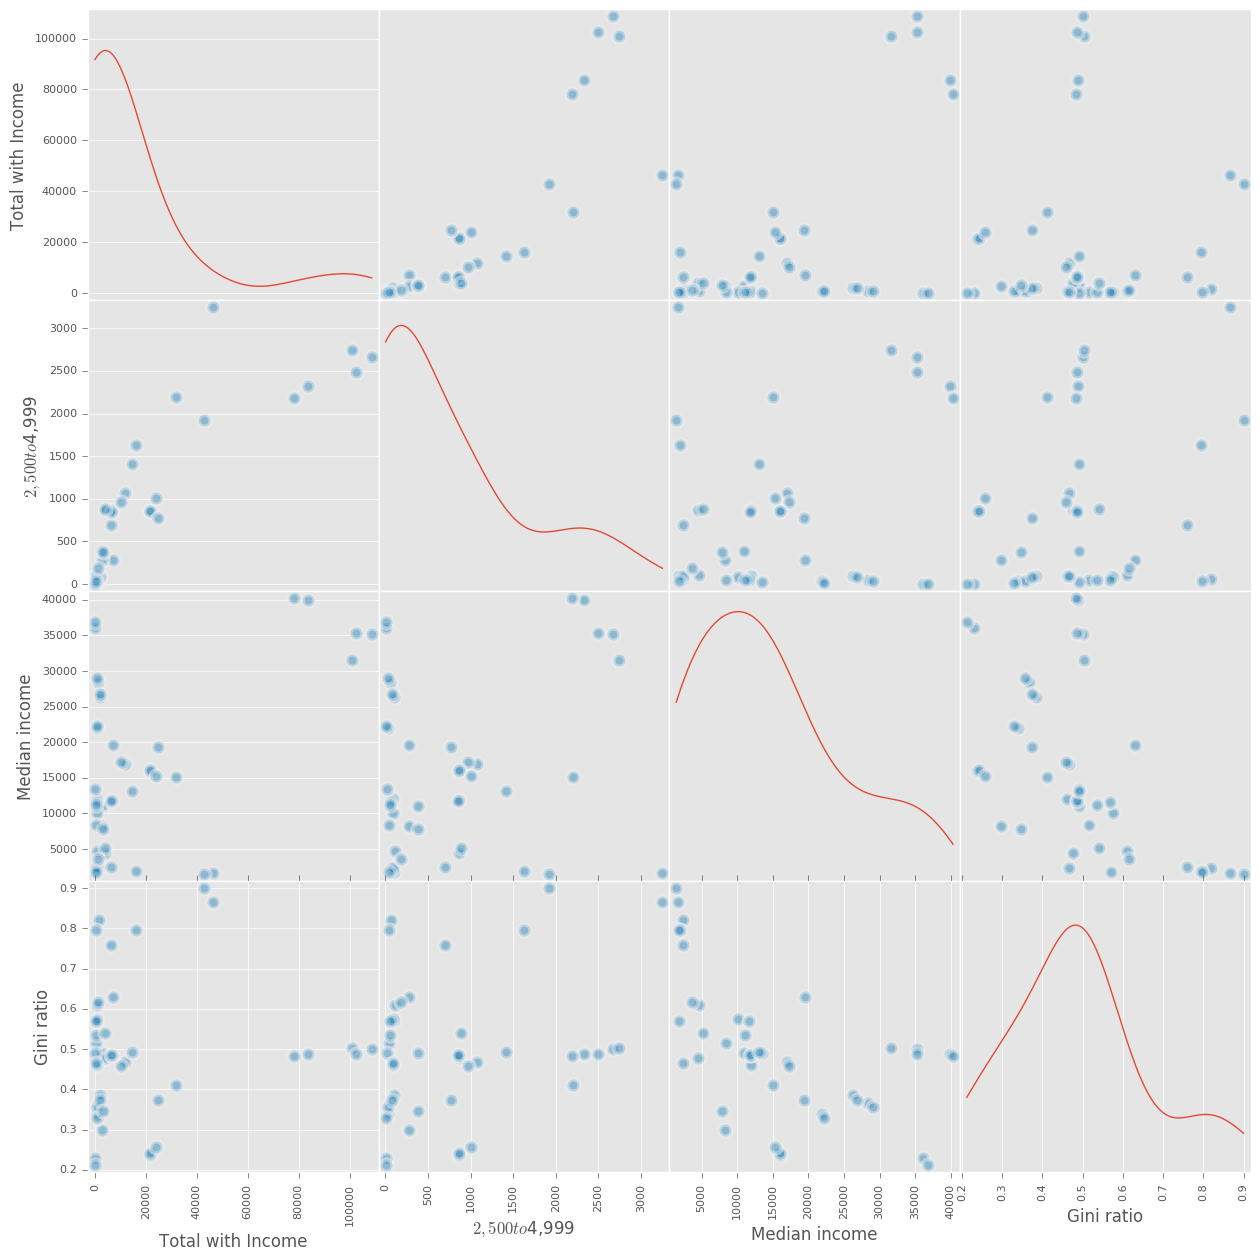

In [10]:
#Plotting the scatter matrix for allmales
fig = pd.scatter_matrix(allmales['all_eth']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(15,15), 
                        diagonal='kde')  

# Figure 1: The scatter matrix above shows the relation between various income sources for males of all ethnicities, the diagonal garphs are the density distributions. 

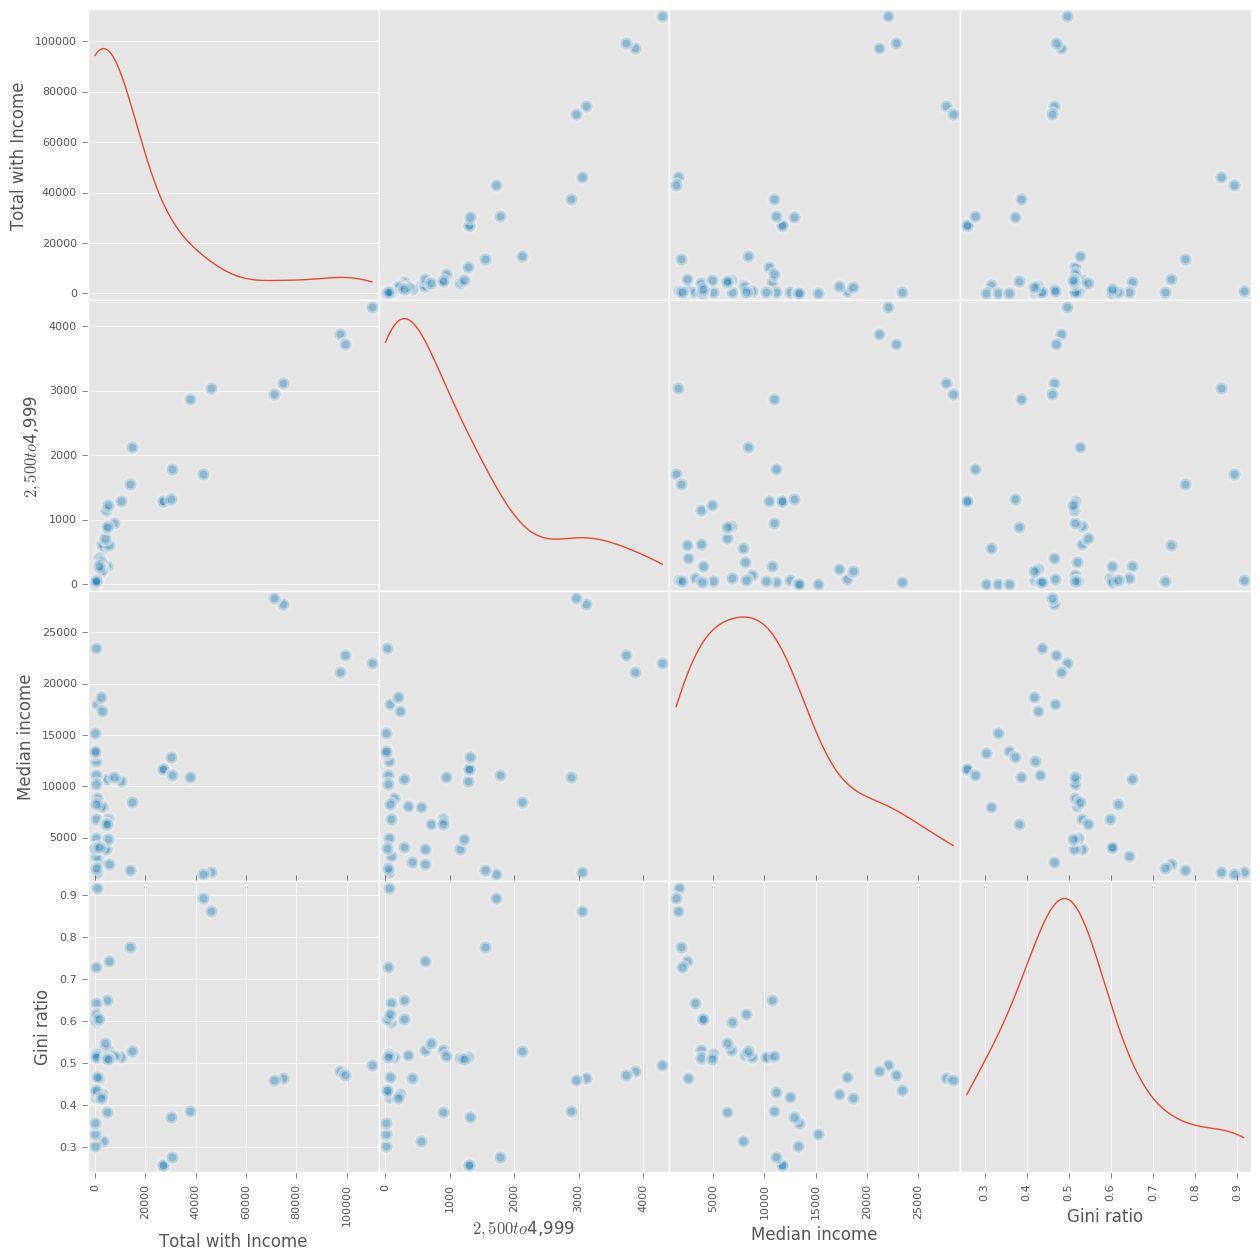

In [11]:
#Plotting the scatter matrix for allfemales
fig = pd.scatter_matrix(allfemales['all_eth']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=300, figsize=(15,15), 
                        diagonal='kde')  

# Figure 1: The scatter matrix above shows the relation between various income sources for females of all ethnicities, the diagonal garphs are the density distributions. 

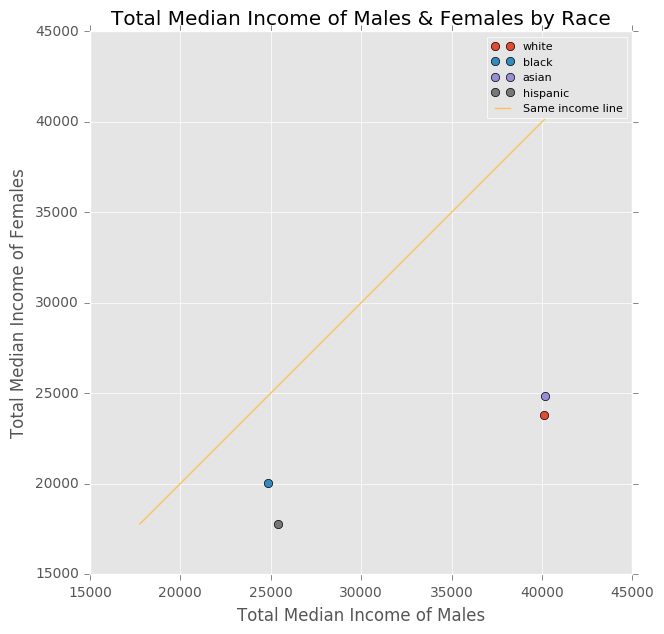

In [12]:
# Check the relationship between income of males and females(Considering Total Median Income)
plt.figure(figsize=(7,7))
X = []
Y = []
for content in contents[3:]:
    y = (allfemales[content[0]].loc['....Total']['Median income'])
    x = (allmales[content[0]].loc['....Total']['Median income'])
    X.append(x)
    Y.append(y)
    plt.plot(x, y, 'o', label=content[0])
    
xy = np.arange(min(Y), max(X), 0.1)
plt.plot(xy, xy, label='Same income line')
plt.xlabel('Total Median Income of Males')
plt.ylabel('Total Median Income of Females')
plt.title('Total Median Income of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 8)

# Figure 3: Total Median Income of Males & Females by Race. The line represents the equal incomes for males & females, the points which are below the equaliser line indicates that the males have more income than females.

Regression Coefficients with intercepts:
Intercept: [ 9943.71985389]
Co-efficient: [[ 0.35736757]]
R_squared: 0.887996175023

Regression Coefficients without intercepts:
Intercept: 0.0
Co-efficient: [[ 0.64675671]]
R_squared: 0.274905145031


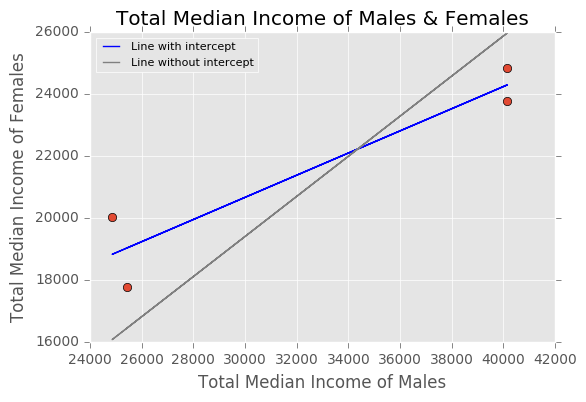

In [13]:
#Using linear regression to fit a line between the data points 

# Initialize model
regression_model = linear_model.LinearRegression()
# Model with intercept = 0 (Not sure what's happening inside mathematically, but the fit is not good!!)
regression_model_int = linear_model.LinearRegression(fit_intercept=False) 

# Train the model using the data
regression_model.fit(X = np.array(X).reshape(-1,1), 
                     y = np.array(Y).reshape(-1,1))

# Check trained model y-intercept
print 'Regression Coefficients with intercepts:'
print 'Intercept:', regression_model.intercept_
print 'Co-efficient:', regression_model.coef_
print 'R_squared:', regression_model.score(X = np.array(X).reshape(-1,1), 
                                           y = np.array(Y).reshape(-1,1))

train_prediction = regression_model.predict(X = np.array(X).reshape(-1,1))

# Plot regression line
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept')

#Check the model without intercept
regression_model_int.fit(X = np.array(X).reshape(-1,1), 
                         y = np.array(Y).reshape(-1,1))
# Check trained model y-intercept
print '\nRegression Coefficients without intercepts:'
print 'Intercept:', regression_model_int.intercept_
print 'Co-efficient:', regression_model_int.coef_
print 'R_squared:', regression_model_int.score(X = np.array(X).reshape(-1,1), 
                                               y = np.array(Y).reshape(-1,1))

train_prediction_int = regression_model_int.predict(X = np.array(X).reshape(-1,1))

# Plot regression line without intercept
plt.plot(X,      # Explanitory variable
         train_prediction_int,  # Predicted values
         color="grey", label='Line without intercept')

plt.plot(X, Y, 'o')
plt.xlabel('Total Median Income of Males')
plt.ylabel('Total Median Income of Females')
plt.title('Total Median Income of Males & Females')
plt.legend(loc='best', fontsize = 8)

# Figure 4: The regression line(with intercept) fits through the data points with less mean squared error than the regression line without intercept. The $R^2$ also supports the interpretation

In [14]:
print("Mean squared error with intercept: %.2f"
      % np.mean((train_prediction - Y) ** 2))
print("Mean squared error without intercept: %.2f"
      % np.mean((train_prediction_int - Y) ** 2))

Mean squared error with intercept: 15293340.61
Mean squared error without intercept: 31909120.74


## Analytical solution for the OLS (ordinary least square) regression

# Bi-variate linear regression

# 1.1. Basic approach - least square estimate

Using Formula for calulating y = w0 + w1*x

w1 = corr[X,Y]*(std(Y)/std(X))

w0 = E[Y] - E[X]*w1

line: y =11705.3297485+0.303388828077*x


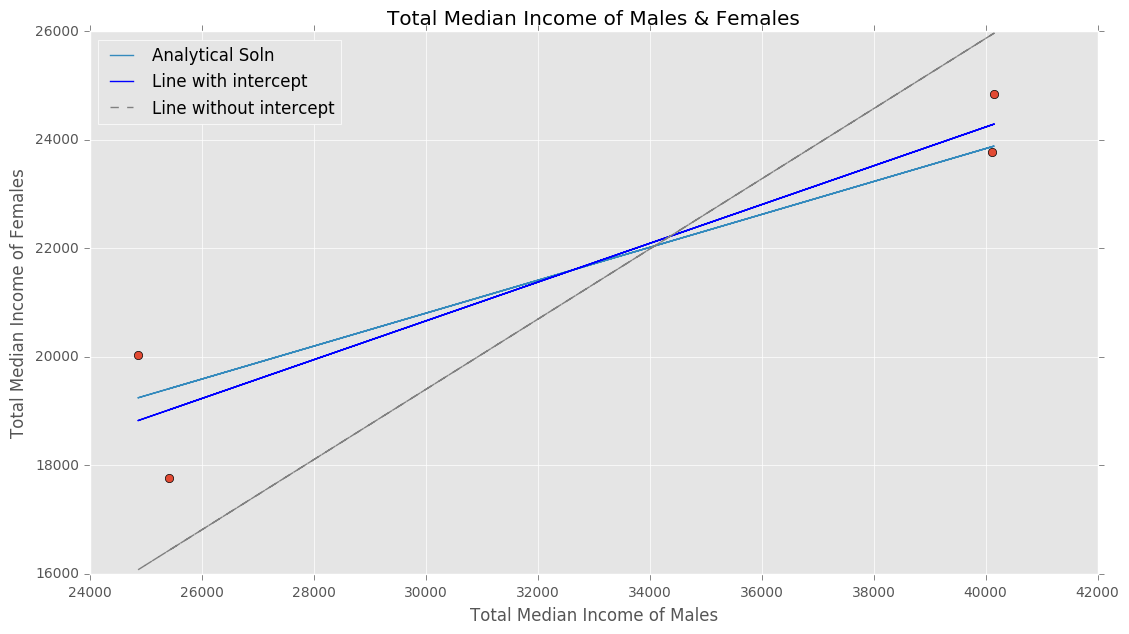

In [15]:
#this is the analytical best regression line. 

#The code given by fedrica considers all ethinicities but only race byu race data is asked
#so not considering it,also the given code takes a point at origin, but the fit was not good, the R^2
#(calculation not shown in book) was also low, so I have not considered origin
all_males=np.array([allmales['white'].loc['....Total','Median income'],
                    allmales['black'].loc['....Total','Median income'],
                     allmales['hispanic'].loc['....Total','Median income'],
                    allmales['asian'].loc['....Total','Median income']])

all_females=np.array([allfemales[k].loc['....Total','Median income'] \
                             for k in ['white', 'black',
                                     'hispanic','asian']])


cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
print 'line: y =' + str(beta0) + '+' + str(beta1) + '*x'

def lines_func(a, x, b):
    return a*x + b

y = lines_func(beta1, np.array(X), beta0)

plt.figure(figsize=(13,7))

#Plot total median income of males and females 
plt.plot(X, Y, 'o')

#plot analytical solution
plt.plot(X, y , lw = 1, label='Analytical Soln')

# Plot regression line
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept')

# Plot regression line without intercept
plt.plot(X,      # Explanitory variable
         train_prediction_int,  # Predicted values
         color="grey", label='Line without intercept', ls='--')

plt.xlabel('Total Median Income of Males')
plt.ylabel('Total Median Income of Females')
plt.title('Total Median Income of Males & Females')
plt.legend(loc='best', fontsize=12)

# Figure 5: The Analytical soln line and the line with the sklearn package is almost similar, the small difference may be because of the mathematical computations(eg. rounding off). The regression line fitted without intercept is way off from a good fit as explained in figure 4

In [16]:
# The R^2 for the analytical solution is calculated below
#The R^2 for the data with origin included gives values of around 0.55(not calculated in the notebook) 
#which his less than the R^2 calculated
x_sqr=np.array(X)*np.array(X)
xy=np.array(X)*np.array(Y)

pred=beta1*np.array(X)+beta0
err=np.array(Y)-pred

R_2=1-(err**2).sum()/((np.array(Y)-y.mean())**2).sum()
R_2

0.86773678341351013

Regression Coefficients with intercepts for total median income:
Intercept: [ 9943.71985389]
Co-efficient: [[ 0.35736757]]
R_squared: 0.887996175023

Regression Coefficients with intercepts for all median incomes:
Intercept: [ 1506.55541391]
Co-efficient: [[ 0.62449128]]
R_squared: 0.863905723784


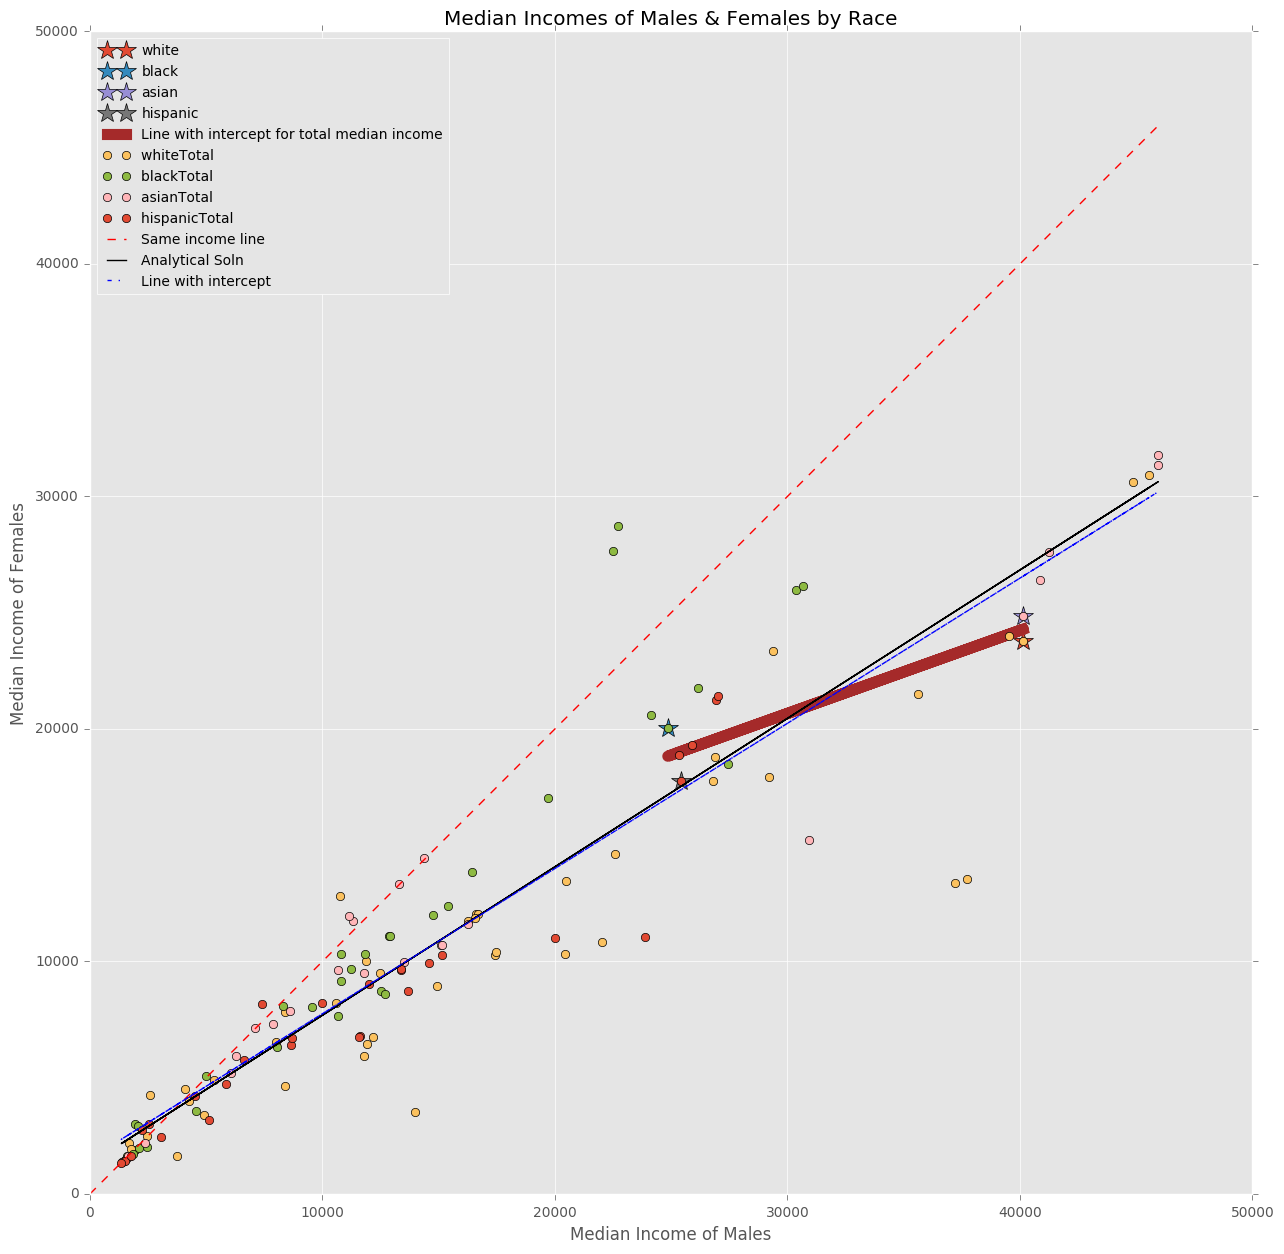

In [17]:
# Considering all the income sources from the excel file, creating a predictive model for median income of females
#using the median income of males
# Considering the regression with intercepts(regression without intercepts is not a good fit so I am not considering it)

plt.figure(figsize=(15,15))
#Plotting the fitted line for the total median income only
Xmt = []
Ymt = []
for content in contents[3:]:
    y = (allfemales[content[0]].loc['....Total']['Median income'])
    x = (allmales[content[0]].loc['....Total']['Median income'])
    Xmt.append(x)
    Ymt.append(y)
    plt.plot(x, y, '*', label=content[0], markersize=15)
    
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the data
regression_model.fit(X = np.array(Xmt).reshape(-1,1), 
                     y = np.array(Ymt).reshape(-1,1))

# Check trained model y-intercept
print 'Regression Coefficients with intercepts for total median income:'
print 'Intercept:', regression_model.intercept_
print 'Co-efficient:', regression_model.coef_
print 'R_squared:', regression_model.score(X = np.array(Xmt).reshape(-1,1), 
                                           y = np.array(Ymt).reshape(-1,1))

train_prediction = regression_model.predict(X = np.array(Xmt).reshape(-1,1))

# Plot regression line
plt.plot(Xmt,      # Explanitory variable
         train_prediction,  # Predicted values
         color="brown", label='Line with intercept for total median income', lw=8)

#Plotting the line for all median incomes
X = []
Y = []
for content in contents[3:]:
    x = (allmales[content[0]].loc[:,['Median income']]).values.flatten()
    y = (allfemales[content[0]].loc[:,['Median income']]).values.flatten()
    mask = ~(np.isnan(x) + np.isnan(y))
    X.extend(x[mask])
    Y.extend(y[mask])
    plt.plot(x[mask], y[mask], 'o', label= str(content[0]) + 'Total ')

xy = np.arange(0, max(X), 0.1)
plt.plot(xy, xy, 'r--', label='Same income line')    

#Analytical Model
cor = stats.spearmanr(X, Y)
beta1 = cor[0] * np.array(Y).std() / np.array(X).std()
beta0 = np.array(Y).mean() - beta1 * np.array(X).mean()
beta0, beta1

def lines_func(a, x, b):
    return a*x + b

y = lines_func(beta1, np.array(X), beta0)

#plot analytical solution
plt.plot(X, y , lw = 1, color='black', label='Analytical Soln')

# Initialize model
regression_model = linear_model.LinearRegression()
#regression_model_int = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the data
regression_model.fit(X = np.array(X).reshape(-1,1), 
                     y = np.array(Y).reshape(-1,1))

# Check trained model y-intercept
print '\nRegression Coefficients with intercepts for all median incomes:'
print 'Intercept:', regression_model.intercept_
print 'Co-efficient:', regression_model.coef_
print 'R_squared:', regression_model.score(X = np.array(X).reshape(-1,1), 
                                           y = np.array(Y).reshape(-1,1))

train_prediction = regression_model.predict(X = np.array(X).reshape(-1,1))

# Plot regression line
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept', ls='-.')

#Check the model without intercept
#regression_model_int.fit(X = np.array(X).reshape(-1,1), 
#                         y = np.array(Y).reshape(-1,1))
# Check trained model y-intercept
#print '\nRegression Coefficients without intercepts:'
#print 'Intercept:', regression_model_int.intercept_
#print 'Co-efficient:', regression_model_int.coef_
#print 'R_squared:', regression_model_int.score(X = np.array(X).reshape(-1,1), 
#                                               y = np.array(Y).reshape(-1,1))

#train_prediction_int = regression_model_int.predict(X = np.array(X).reshape(-1,1))

# Plot regression line without intercept
#plt.plot(X,      # Explanitory variable
#         train_prediction_int,  # Predicted values
#         color="black", ls='-.', label='Line without intercept')

plt.xlabel('Median Income of Males')
plt.ylabel('Median Income of Females')
plt.title('Median Incomes of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 10)

# Figure 6: The plot above shows the lines fitted through all the median incomes for all races. The analytical soln fitted line and the sklearn fitted line are almost similar, but the fitted line with total median income is different from the newly fitted line. The points which are around 45000(x-axis) are high leverage points(extreme x-axis values)

## The high leverage values are highly influential? 
### The previously fitted brown line is not similar to the newly fitted regression lines(which are closer to the high leverage points), so I think the high leverage points are highly influential.

### PS: I did not understand how to use p-values to calculate this!! I tried to refer ('https://onlinecourses.science.psu.edu/stat501/node/337')

# 6. PREDICTION


## Predict what a woman in a position where a man recieves your ideal stipend would make

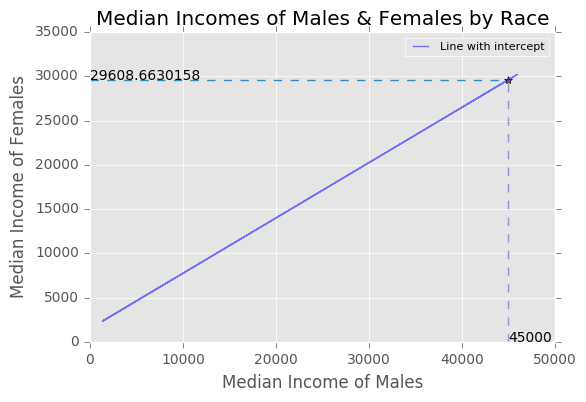

In [18]:
x = 45000
stipend_predict = regression_model.predict(X = np.array(x).reshape(-1,1))
plt.plot(x,stipend_predict[0][0], '*')
plt.plot([0,x], [stipend_predict[0][0],stipend_predict[0][0]], ls='--')
plt.plot([x,x], [0,stipend_predict[0][0]], ls='--')
plt.plot(X,      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue", label='Line with intercept', alpha =0.5)
plt.text(x,0,x)
plt.text(0,stipend_predict[0][0],stipend_predict[0][0])
plt.xlabel('Median Income of Males')
plt.ylabel('Median Income of Females')
plt.title('Median Incomes of Males & Females by Race')
plt.legend(loc = 'best', fontsize = 8)

# Figure 7: The linear prediction models predicts that a female will earn \$29608 stipend whereas a male would earn a \$45000 stipend

# 7. Do you have any comments about what these data tell us about race? 
how you would go about analyzing race differences with these data? (just a few sentences)

In [19]:
#The data does show some relationship between the earnings of males and females by races.
#If we consider the total median income for the races: 

for content in contents[3:]:
    print 'Male ' + str(content[0]) + ':' + str(allmales[content[0]].loc['....Total']['Median income'])

print '\n'    
for content in contents[3:]:
    print 'Female ' + str(content[0]) + ':' + str(allfemales[content[0]].loc['....Total']['Median income'])

Male white:40122.0
Male black:24855.0
Male asian:40153.0
Male hispanic:25411.0


Female white:23780.0
Female black:20044.0
Female asian:24840.0
Female hispanic:17762.0


In [20]:
# Considering the total median income(Median income gives more better understanding than the mean 
# because the mean can be influenced by the outliers), the sequence is 
#Male: Asian > White > Hispanic > Black
#Female: Asian > White > Black > Hispanic

In [21]:
# However, for proper analysis we need to consider the various sources, the social incomes
#(eg. social security, Unemployment compensation, etc) may be an influential factors for the race income distribution.
# To analyse such data, I would consider the wages and social incomes separately for the different races and compare them